In [0]:
# import shutil 
# shutil.rmtree('data/catsvsdogs')

# Transfer Learning

In this notebook, we will go through basics of Transfer Learning using cats vs dogs dataset from kaggle.

Here we will use [keras](https://keras.io  "Keras Tutorial").


Hey yo, but what is Transfer Learning?

Everything is explained in-detail in [blog post](dudeperf3ct.github.io). This is notebook which replicates the result of blog and runs in colab. Enjoy!


#### Run in Colab

You can run this notebook in google colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Getting Data


The cats vs dogs dataset isn't available on keras library. You can download it from Kaggle however. Let's see how to do this by using the Kaggle API as it's going to be pretty useful to you if you want to join a competition or use other Kaggle datasets later on.

First, install the Kaggle API by uncommenting the following line and executing it, or by executing it in your terminal.

In [0]:
!pip install --upgrade kaggle scikit-plot

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.1.1)




Then you need to upload your credentials from Kaggle on your instance. Login to kaggle and click on your profile picture on the top left corner, then 'My account'. Scroll down until you find a button named 'Create New API Token' and click on it. This will trigger the download of a file named 'kaggle.json'.

Upload this file to the directory this notebook is running in, by clicking "Upload" on your main Jupyter page, then uncomment and execute the next two commands (or run them in a terminal).


In [0]:
#uncomment this once to upload kaggle.json

from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving kaggle.json to kaggle.json


In [0]:
#uncomment and run this once when you upload kaggle.json

! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/



```
# This is formatted as code
```

You're all set to download the data from [Dogs vs. Cats Redux: Kernels Edition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data) competition. You first need to go to its main page and accept its rules, and run the two cells below (uncomment the shell commands to download and unzip the data). If you get a 403 forbidden error it means you haven't accepted the competition rules yet (you have to go to the competition page, click on Rules tab, and then scroll to the bottom to find the accept button).


In [0]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition -p 'data/catsvsdogs'

 94% 254M/271M [00:02<00:00, 62.8MB/s]
100% 271M/271M [00:02<00:00, 98.4MB/s]
 97% 528M/544M [00:03<00:00, 178MB/s]
100% 544M/544M [00:03<00:00, 156MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 110MB/s]


In [0]:
path = 'data/catsvsdogs/'

! unzip -q -n {path}/train.zip -d {path}
! unzip -q -n {path}/test.zip -d {path}

In [0]:
train_path = 'data/catsvsdogs/train/'
val_path = 'data/catsvsdogs/val/'
test_path = 'data/catsvsdogs/test/'
train_cats_dir = f'{train_path}cats/'
train_dogs_dir = f'{train_path}dogs/'
val_cats_dir = f'{val_path}cats/'
val_dogs_dir = f'{val_path}dogs/'

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import random
from PIL import Image
%matplotlib inline

In [0]:
print ('Training set images', len(os.listdir(train_path)))
print ('Test set images', len(os.listdir(test_path)))

Training set images 25000
Test set images 12500



data/
    train/
        dog001.jpg
        dog002.jpg
        ...
        cat001.jpg
        cat002.jpg
        ...
    test/
        001.jpg
        002.jpg
        ...


In [0]:
train_imgs = os.listdir(train_path)
train_cats_dir = f'{train_path}cats/'
train_dogs_dir = f'{train_path}dogs/'
os.makedirs(train_cats_dir)
os.makedirs(train_dogs_dir)
print ('[INFO] Train Folder for dogs and cats created....')

print ('[INFO] Moving train images to dogs and cats folders....')
for img in tqdm(train_imgs):
    ex = img.split('.')
    new_img = ex[0]+ex[1]+'.'+ex[2]
    if ex[0] == 'dog':
        os.rename(f'{train_path}{img}', f'{train_dogs_dir}{new_img}')
    else:
        os.rename(f'{train_path}{img}', f'{train_cats_dir}{new_img}')   
print ('[INFO] Moving images from train to cats and dogs complete... ')   

 13%|█▎        | 3234/25000 [00:00<00:00, 32331.24it/s]

[INFO] Train Folder for dogs and cats created....
[INFO] Moving train images to dogs and cats folders....


100%|██████████| 25000/25000 [00:00<00:00, 31706.75it/s]

[INFO] Moving images from train to cats and dogs complete... 




data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    test/
        001.jpg
        002.jpg
        003.jpg
        004.jpg
        ...

In [0]:
# create validation set from 20% of training set sampled randomly

val_path = 'data/catsvsdogs/val/'
train_cat_imgs = os.listdir(train_cats_dir)
train_dog_imgs = os.listdir(train_dogs_dir)
os.makedirs(val_path)
print ('[INFO] Val Folder created....')
val_cats_dir = f'{val_path}cats/'
val_dogs_dir = f'{val_path}dogs/'
os.makedirs(val_cats_dir)
os.makedirs(val_dogs_dir)
print ('[INFO] Val Folder for dogs and cats created....')

print ('[INFO] Random sample 20% of cats from train to val...')
val_size = 0.2
trn_cat_imgs = os.listdir(train_cats_dir)
val_cat_len = int(len(trn_cat_imgs) * 0.2)
val_cat_imgs = random.sample(trn_cat_imgs, val_cat_len)

for img in tqdm(val_cat_imgs):
    os.rename(f'{train_cats_dir}{img}', f'{val_cats_dir}{img}')  
print ('[INFO] Moving images from train cat to val cat complete...')   

print ('[INFO] Random sample 20% of dogs from train to val...')
val_size = 0.2
trn_dog_imgs = os.listdir(train_dogs_dir)
val_dog_len = int(len(trn_dog_imgs) * 0.2)
val_dog_imgs = random.sample(trn_dog_imgs, val_dog_len)

for img in tqdm(val_dog_imgs):
    os.rename(f'{train_dogs_dir}{img}', f'{val_dogs_dir}{img}')  
print ('[INFO] Moving images from train dog to val dog complete... ')   


  0%|          | 0/2500 [00:00<?, ?it/s]

[INFO] Val Folder created....
[INFO] Val Folder for dogs and cats created....
[INFO] Random sample 20% of cats from train to val...
[INFO] Moving images from train cat to val cat complete...
[INFO] Random sample 20% of dogs from train to val...


100%|██████████| 2500/2500 [00:00<00:00, 30603.92it/s]

[INFO] Moving images from train dog to val dog complete... 


In [0]:
print ('Training set images', len(os.listdir(train_cats_dir))+len(os.listdir(train_dogs_dir)))
print ('Validation set images', len(os.listdir(val_cats_dir))+len(os.listdir(val_dogs_dir)))
print ('Test set images', len(os.listdir(test_path)))

Training set images 20000
Validation set images 5000
Test set images 12500



# Keras

In [0]:
# load all the required libraries

import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split  # split dataset
import keras                                          # import keras with tensorflow as backend
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img, img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Model, Sequential            # sequential and functional api keras 
from keras.layers import Dense, Input, Conv2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, MaxPooling2D, InputLayer # dense and input layer for constructing mlp
from keras.optimizers import SGD
np.random.seed(42)

Using TensorFlow backend.


In [0]:
# # use small subset of train, val and test

train_cats = os.listdir(train_cats_dir)
train_cats = random.sample(train_cats, 2000)
train_dogs = os.listdir(train_dogs_dir)
train_dogs = random.sample(train_dogs, 2000)
val_cats = os.listdir(val_cats_dir)
val_cats = random.sample(val_cats, 400)
val_dogs = os.listdir(val_dogs_dir)
val_dogs = random.sample(val_dogs, 400)
test_img = os.listdir(test_path)
test_img = random.sample(test_img, 50)

print ('New Training set images', len(train_cats)+len(train_dogs))
print ('New Validation set images', len(val_cats)+len(val_dogs))
print ('New Testing set images', len(test_img))

New Training set images 4000
New Validation set images 800
New Testing set images 50


In [0]:
IMG_DIM = (224, 224)

In [0]:
train_X = [train_cats_dir+cats for cats in train_cats]
train_X = train_X + [train_dogs_dir+dogs for dogs in train_dogs]
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_X]
train_imgs = np.array(train_imgs)
train_labels = [l.split('/')[-1].split('.')[0].strip('0123456789') for l in train_X]
train_labels = np.array(train_labels)
print ('Training shape:', train_imgs.shape, train_labels.shape) 

val_X = [val_cats_dir+cats for cats in val_cats]
val_X = val_X + [val_dogs_dir+dogs for dogs in val_dogs]
val_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in val_X]
val_imgs = np.array(val_imgs)
val_labels = [l.split('/')[-1].split('.')[0].strip('0123456789') for l in val_X]
val_labels = np.array(val_labels)
print ('Validation shape:', val_imgs.shape, val_labels.shape) 

test_X = [test_path+imgs for imgs in test_img]
test_X = random.sample(test_X, 50)
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_X]
test_imgs = np.array(test_imgs)
print ('Testing shape:', test_imgs.shape) 

Training shape: (4000, 224, 224, 3) (4000,)
Validation shape: (800, 224, 224, 3) (800,)
Testing shape: (50, 224, 224, 3)


In [0]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
val_labels_enc = le.transform(val_labels)

print(train_labels[:5], train_labels_enc[:5])

['cat' 'cat' 'cat' 'cat' 'cat'] [0 0 0 0 0]


## Visualization of data

Enough talk, show me the data!

In [0]:
def preprocess_img(img, ax, label, train_dir):
    im = Image.open(os.path.join(train_dir, img))
    size = im.size
    ax.imshow(im)
    ax.set_title(f'{label} {size}')

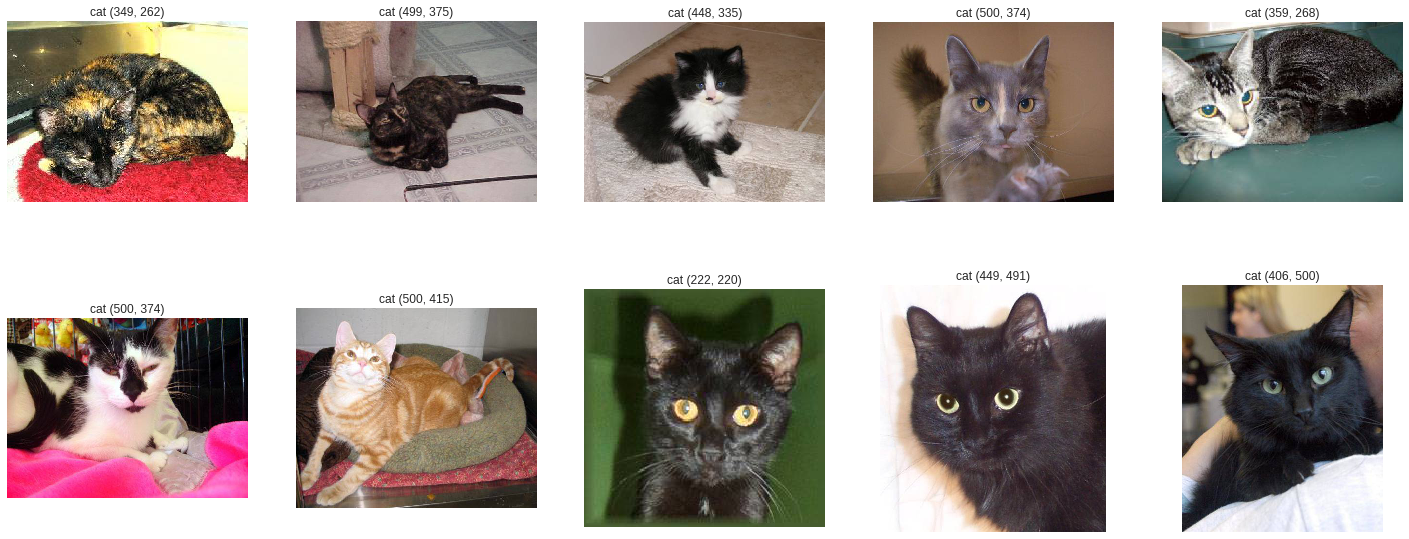

In [0]:
train_x = os.listdir(train_cats_dir)
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 10))

for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    preprocess_img(train_x[idx], ax, 'cat', train_cats_dir)
    # print out the correct label for each image

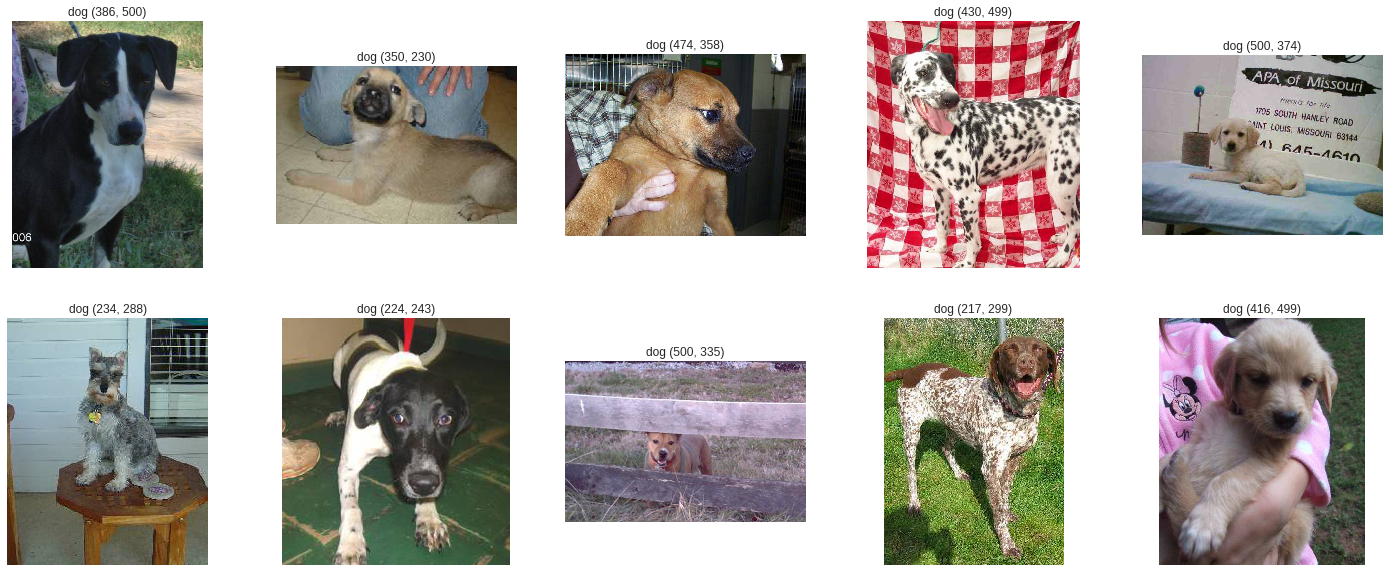

In [0]:
train_x = os.listdir(train_dogs_dir)
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 10))

for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    preprocess_img(train_x[idx], ax, 'dog', train_dogs_dir)
    # print out the correct label for each image

### ConvNet as feature extractor

In [0]:
# [0-9] unique labels
batch_size = 50
num_classes = 2
epochs = 50

# input image dimensions
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   zoom_range=0.3, 
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=80)
val_generator = val_datagen.flow(val_imgs, val_labels_enc, batch_size=16)

In [0]:
def pretrained_models(name):
    
    if name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, 
                           input_shape=input_shape)
 
        output = base_model.layers[-1].output
        output = Flatten()(output)
        
    model = Model(inputs=base_model.input, outputs=output) 
  
    return model

vgg_model = pretrained_models('VGG16')

vgg_model.trainable = False
for layer in vgg_model.layers:
  layer.trainable = False

import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Name', 'Layer Trainable'])  

58892288/58889256 [==============================] - 1s 0us/step


Layer Name  Layer Trainable
0   input_1       False          
1   block1_conv1  False          
2   block1_conv2  False          
3   block1_pool   False          
4   block2_conv1  False          
5   block2_conv2  False          
6   block2_pool   False          
7   block3_conv1  False          
8   block3_conv2  False          
9   block3_conv3  False          
10  block3_pool   False          
11  block4_conv1  False          
12  block4_conv2  False          
13  block4_conv3  False          
14  block4_pool   False          
15  block5_conv1  False          
16  block5_conv2  False          
17  block5_conv3  False          
18  block5_pool   False          
19  flatten_1     False

In [0]:
input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 25088)             14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 27,823,425
Trainable params: 13,108,737
Non-trainable params: 14,714,688
_______________________________________________________

In [0]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=50, 
                              epochs=epochs,
                              validation_data=val_generator, 
                              validation_steps=50) 

Epoch 1/50
50/50 [==============================] - 71s 1s/step - loss: 0.8805 - acc: 0.6373 - val_loss: 0.3111 - val_acc: 0.8612
Epoch 2/50
50/50 [==============================] - 60s 1s/step - loss: 0.4145 - acc: 0.8145 - val_loss: 0.2918 - val_acc: 0.8650
Epoch 3/50
50/50 [==============================] - 61s 1s/step - loss: 0.3371 - acc: 0.8492 - val_loss: 0.2929 - val_acc: 0.8712
Epoch 4/50
50/50 [==============================] - 60s 1s/step - loss: 0.3755 - acc: 0.8210 - val_loss: 0.2396 - val_acc: 0.8888
Epoch 5/50
50/50 [==============================] - 61s 1s/step - loss: 0.3447 - acc: 0.8423 - val_loss: 0.2149 - val_acc: 0.9175
Epoch 6/50
50/50 [==============================] - 60s 1s/step - loss: 0.3153 - acc: 0.8640 - val_loss: 0.1894 - val_acc: 0.9225
Epoch 7/50
50/50 [==============================] - 60s 1s/step - loss: 0.3164 - acc: 0.8600 - val_loss: 0.2024 - val_acc: 0.9187
Epoch 8/50
50/50 [==============================] - 60s 1s/step - loss: 0.3190 - acc: 0.86

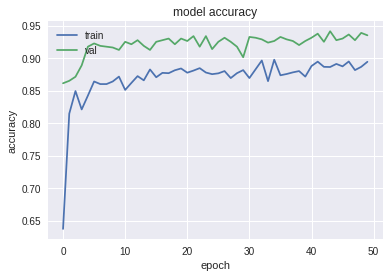

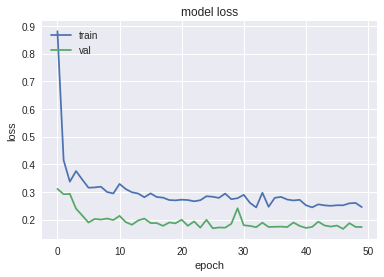

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
test_predictions = model.predict_on_batch(test_imgs/225.)
print (test_predictions.shape)

(50, 1)


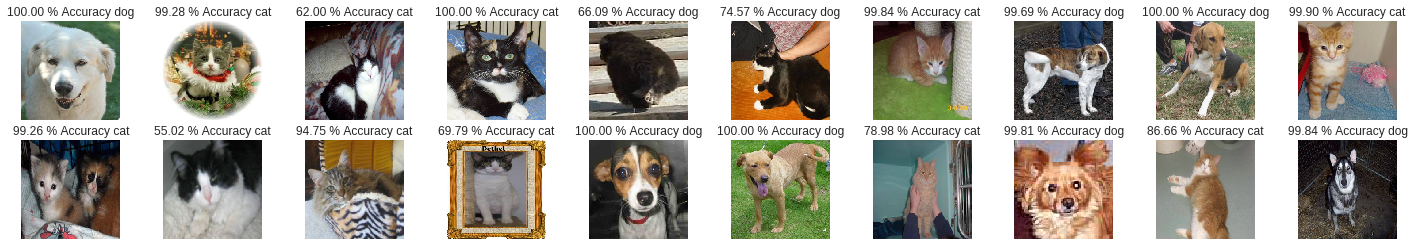

In [0]:
# obtain one batch of test images
images, predict = test_imgs, test_predictions

# convert output probabilities to predicted class
preds = (predict > 0.5).astype('int')

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(array_to_img(images[idx]))
    if preds[idx] == 0:
        test_predictions[idx] = 1-test_predictions[idx]
    ax.set_title("{:.2f} % Accuracy {}".format(float(test_predictions[idx][0]*100), 'cat' if preds[idx]==0 else 'dog'))

In [0]:
v_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow(val_imgs, val_labels_enc, batch_size=batch_size)
img, lbl = val_generator.next()

v_predictions = model.predict_on_batch(img)
print (v_predictions.shape, lbl.shape)
print (v_predictions[:5], lbl[:5])

(50, 1) (50,)
[[0.5877145 ]
 [1.        ]
 [0.9941321 ]
 [0.98659295]
 [0.00550673]] [1 1 1 1 1]


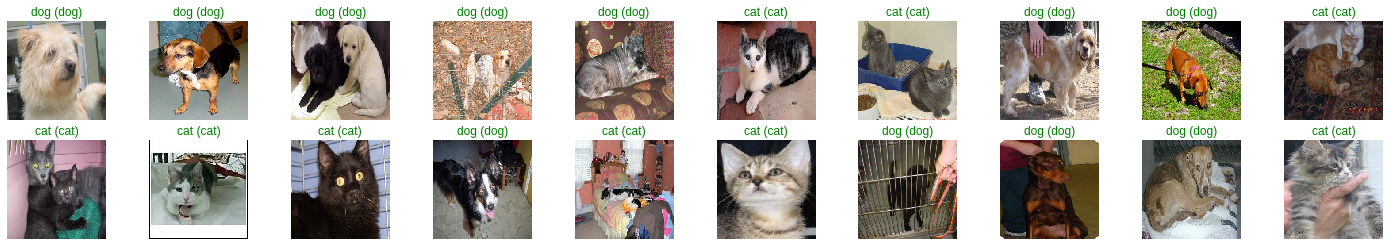

In [0]:
# obtain one batch of test images
images, predict = img, lbl

# convert output probabilities to predicted class
pred = (predict > 0.5).astype('int')
preds = le.inverse_transform(pred)
labels = le.inverse_transform(lbl)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(array_to_img(images[idx]))
    ax.set_title("{} ({})".format(str(preds[idx]), str(labels[idx])),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [0]:
val_preds = model.predict(val_imgs, batch_size=batch_size)
print (val_preds.shape, val_labels_enc.shape)

(800, 1) (800,)


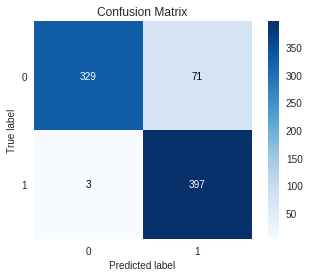

In [0]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(val_labels_enc, val_preds.astype('int'), normalize=False)

In [0]:
model.save('bottleneck-features.h5')

### Fine tuning

In [0]:
for i, layer in enumerate(vgg_model.layers):
    print (i, layer.name, layer.trainable)
    
for i, layer in enumerate(model.layers):
    print (i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 flatten_1 False
0 model_1 False
1 dense_1 True
2 dropout_1 True
3 dense_2 True
4 dropout_2 True
5 dense_3 True


In [0]:
# we chose to train the top 1 convolution block, i.e. we will freeze
# the first 15 layers and unfreeze the rest:
for layer in vgg_model.layers[:11]:
    layer.trainable = False
for layer in vgg_model.layers[11:]:
    layer.trainable = True

for i, layer in enumerate(vgg_model.layers):
    print (i, layer.name, layer.trainable)
    
    
model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=0.0001, momentum=0.9),
              metrics=['accuracy'])
                 
print (model.summary())

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_1 True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 25088)             14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656   

In [0]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=50, 
                              epochs=20,
                              validation_data=val_generator, 
                              validation_steps=50) 

Epoch 1/20
50/50 [==============================] - 83s 2s/step - loss: 0.2441 - acc: 0.8890 - val_loss: 0.1756 - val_acc: 0.9336
Epoch 2/20
50/50 [==============================] - 74s 1s/step - loss: 0.2423 - acc: 0.8928 - val_loss: 0.1749 - val_acc: 0.9328
Epoch 3/20
50/50 [==============================] - 74s 1s/step - loss: 0.2305 - acc: 0.8990 - val_loss: 0.1692 - val_acc: 0.9340
Epoch 4/20
50/50 [==============================] - 74s 1s/step - loss: 0.2361 - acc: 0.8977 - val_loss: 0.1740 - val_acc: 0.9276
Epoch 5/20
50/50 [==============================] - 74s 1s/step - loss: 0.2211 - acc: 0.9025 - val_loss: 0.1799 - val_acc: 0.9224
Epoch 6/20
50/50 [==============================] - 74s 1s/step - loss: 0.2389 - acc: 0.8950 - val_loss: 0.1687 - val_acc: 0.9348
Epoch 7/20
50/50 [==============================] - 74s 1s/step - loss: 0.2377 - acc: 0.8930 - val_loss: 0.1799 - val_acc: 0.9304
Epoch 8/20
50/50 [==============================] - 73s 1s/step - loss: 0.2223 - acc: 0.90

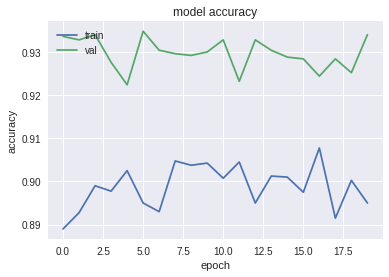

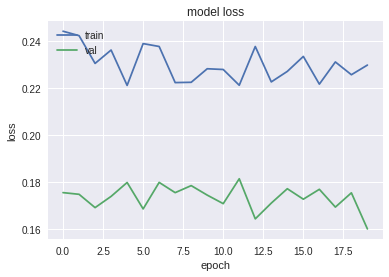

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
test_predictions = model.predict_on_batch(test_imgs)
print (test_predictions.shape)

(50, 1)


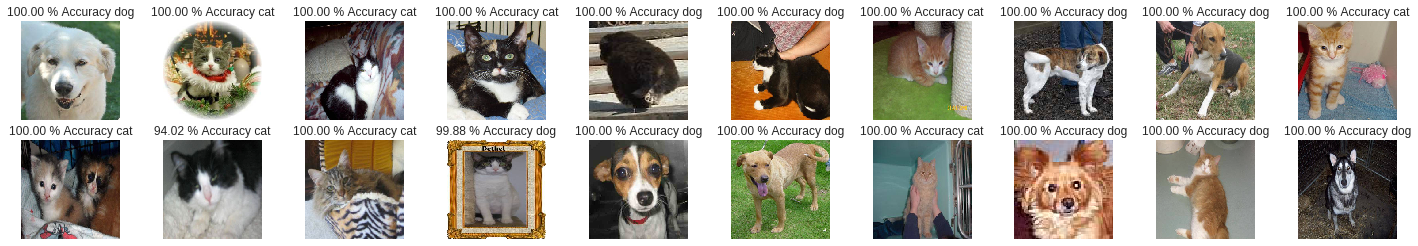

In [0]:
# obtain one batch of test images
images, predict = test_imgs, test_predictions

# convert output probabilities to predicted class
preds = (predict > 0.5).astype('int')

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(array_to_img(images[idx]))
    if preds[idx] == 0:
        test_predictions[idx] = 1-test_predictions[idx]
    ax.set_title("{:.2f} % Accuracy {}".format(float(test_predictions[idx][0]*100), 'cat' if preds[idx][0]==0 else 'dog'))

In [0]:
model.save('finetune.h5')

In [0]:
v_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow(val_imgs, val_labels_enc, batch_size=batch_size)
img, lbl = val_generator.next()

v_predictions = model.predict_on_batch(img)
print (v_predictions.shape, lbl.shape)
print (v_predictions[:5], lbl[:5])

(50, 1) (50,)
[[8.9467996e-01]
 [3.6521584e-01]
 [4.8128858e-01]
 [1.9999747e-01]
 [5.2365294e-04]] [0 1 1 1 0]


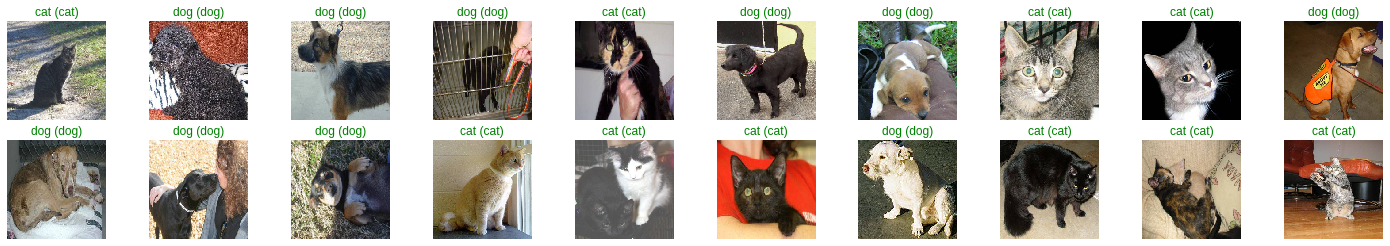

In [0]:
# obtain one batch of test images
images, predict = img, lbl

# convert output probabilities to predicted class
pred = (predict > 0.5).astype('int')
preds = le.inverse_transform(pred)
labels = le.inverse_transform(lbl)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(array_to_img(images[idx]))
    ax.set_title("{} ({})".format(str(preds[idx]), str(labels[idx])),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [0]:
val_preds = model.predict(val_imgs, batch_size=batch_size)
print (val_preds.shape, val_labels_enc.shape)

(800, 1) (800,)


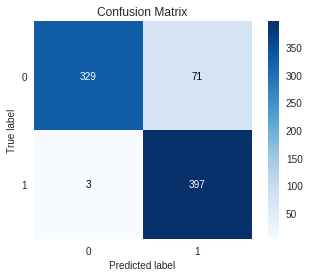

In [0]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(val_labels_enc, val_preds.astype('int'), normalize=False)

In [0]:
from google.colab import files
files.download('finetune.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 41760, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
from google.colab import files
files.download('bottleneck-features.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 35214, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil